In [1]:
import torch
from torch.utils.data import DataLoader
import os
import pandas as pd
from work.utils.dataset import PandasDataset, RGB2YHUTransform
from work.utils.models import EfficientNet
from work.utils.metrics import evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import albumentations

In [2]:
output_dimensions = 5
data_dir = '../../dataset'
images_dir = os.path.join(data_dir, 'tiles')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
df_test = pd.read_csv(f"../data/test.csv")
backbone_model = 'efficientnet-b0'
pretrained_model = {
    backbone_model: '/home/woshington/Projects/Doutorado/work/efficientnet-b0-08094119.pth'
}

In [3]:
print("Cuda", device)

Cuda cuda


In [4]:
from work.utils.dataset import RGB2YHVTransform

val_transform =albumentations.Compose([
    RGB2YHVTransform()
])

In [5]:
dataloader = DataLoader(
    PandasDataset(images_dir, df_test, transforms=val_transform),
    batch_size=2,
    shuffle=False,
)

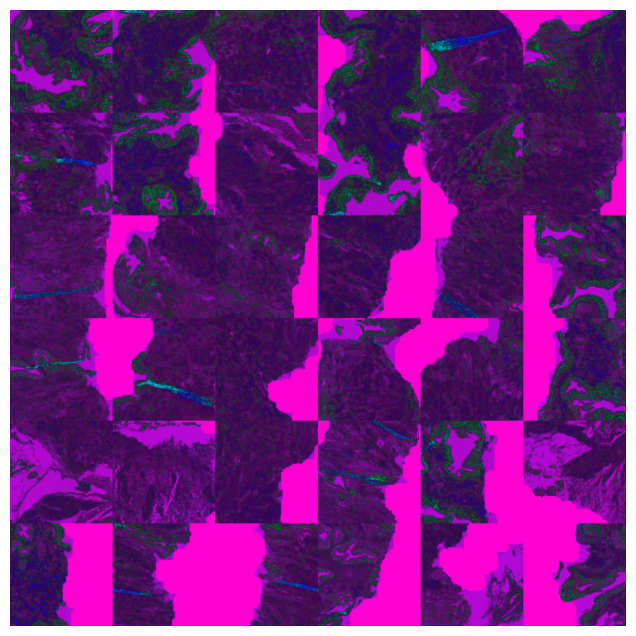

In [6]:
batch = next(iter(dataloader))
images, labels, _ = batch
plt.figure(figsize=(8, 8))
plt.imshow(torch.clamp(images[0], 0, 1).permute(1, 2, 0).numpy(), cmap='gray')
plt.axis('off')
# plt.title(f'Label: {labels[0].item()}')
plt.savefig("YHV.png", dpi=300)
plt.show()


In [7]:
model = EfficientNet(
    backbone=backbone_model,
    output_dimensions=output_dimensions,
    pre_trained_model=pretrained_model
)
model.to(device)
model.load_state_dict(
    torch.load(
        "models/with-noise-yhv.pth",
        weights_only=True
    )
)

response_0 = evaluation(model, dataloader, device)
print("without treatment", response_0[0])

Loaded pretrained weights for efficientnet-b0


100%|██████████| 796/796 [11:13<00:00,  1.18it/s]


without treatment {'val_acc': {'mean': 54.49585420191288, 'std': 1.239133160041633, 'ci_5': 52.51256227493286, 'ci_95': 56.53580367565155}, 'val_kappa': {'mean': 0.7612249003358519, 'std': 0.013583317663715202, 'ci_5': 0.7387105098375467, 'ci_95': 0.7843003564518032}, 'val_f1': {'mean': 0.4643835244476795, 'std': 0.01293594837217649, 'ci_5': 0.4436734512448311, 'ci_95': 0.4857582822442055}, 'val_recall': {'mean': 0.459081780731678, 'std': 0.012172782825540808, 'ci_5': 0.4403328463435173, 'ci_95': 0.4796984076499939}, 'val_precision': {'mean': 0.4913867481946945, 'std': 0.01398816265897196, 'ci_5': 0.4693394169211388, 'ci_95': 0.5144709825515748}}
